<a href="https://colab.research.google.com/github/hmlewis-astro/street_network_deep_learning/blob/main/final_model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!mkdir figures

# Import packages and libraries

In [20]:
import os
import glob
from tqdm import tqdm
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import models

import tensorflow.keras.backend as K

from sklearn.metrics import f1_score as f1_score_sklearn

from google.colab import files


2.6.0


# Get test data

In [5]:
with open('/content/drive/MyDrive/deep-globe-sat-img-train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('/content/drive/MyDrive/deep-globe-mask-train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('/content/drive/MyDrive/deep-globe-sat-img-test.pkl', 'rb') as f:
    X_test = pickle.load(f)


In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)


In [7]:
X_train.shape, y_train.shape, X_test.shape

((6226, 256, 256, 3), (6226, 256, 256), (2344, 256, 256, 3))

# Define custom F1 score metric

In [8]:
def f1_score(y_true, y_pred):    

    def recall_func(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (positives+K.epsilon())    
        return recall 
    
    
    def precision_func(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (pred_positives+K.epsilon())
        return precision 
    
    precision, recall = precision_func(y_true, y_pred), recall_func(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Load trained model weights

In [9]:
print('Loading previously trained model.')
trained_model = models.load_model('/content/drive/MyDrive/satellite_segmentation.h5', custom_objects={'f1_score':f1_score})

Loading previously trained model.


In [10]:
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Display some test satellite images (i.e., those without annotations) and predicted road map mask

In [44]:
def display_img_mask_pred(index, save_fig=False):
    
    fig, ax = plt.subplots(1,3, figsize=(10,4))
    
    ax[0].imshow(X_train[index])
    ax[0].set_title('Satellite Image')
    
    ax[1].imshow(y_train[index], cmap='Greys')
    ax[1].set_title('Road Map')
    
    predict_data = trained_model.predict(X_train[index].reshape(-1, 256, 256, 3))[0]
    
    ax[2].imshow(predict_data[:, :, 0], cmap='Greys')
    ax[2].set_title('Predicted Road Map')
    
    plt.tight_layout()
    
    if save_fig:
      fig.savefig(f'figures/predicted_road_map_final_model_{index}.png', dpi=300)
      files.download(f'figures/predicted_road_map_final_model_{index}.png') 
    
    #plt.close()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

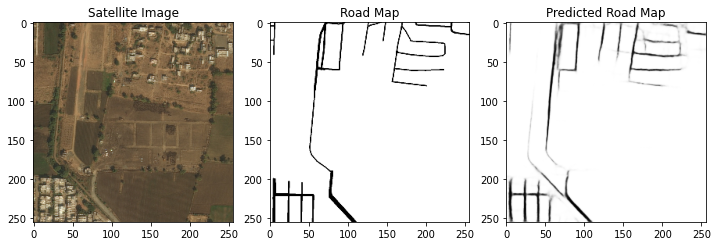

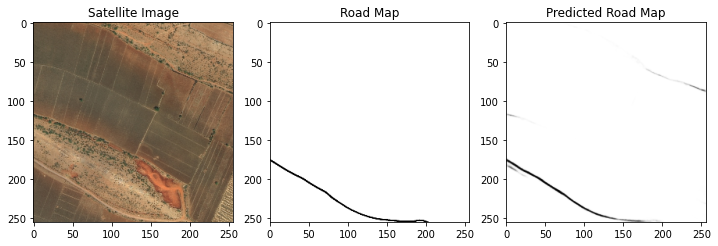

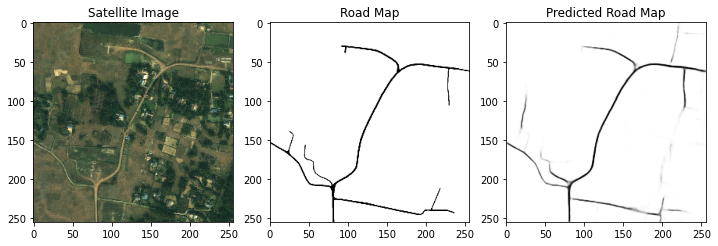

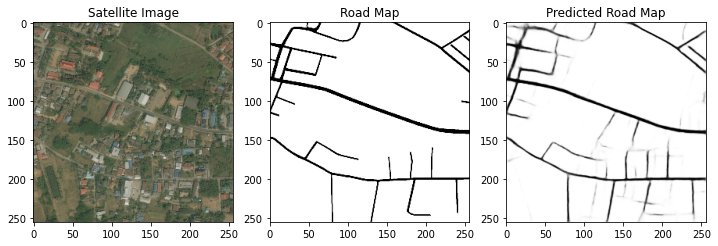

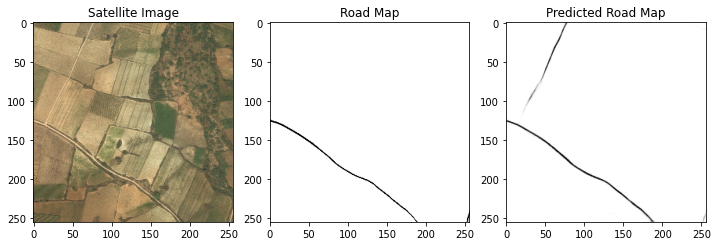

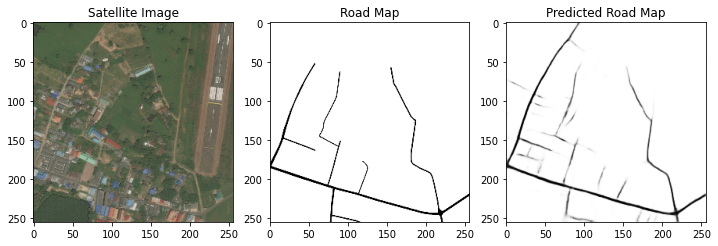

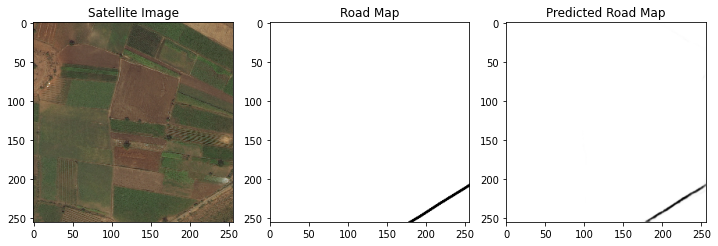

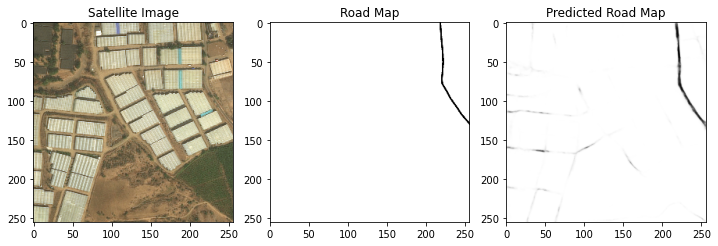

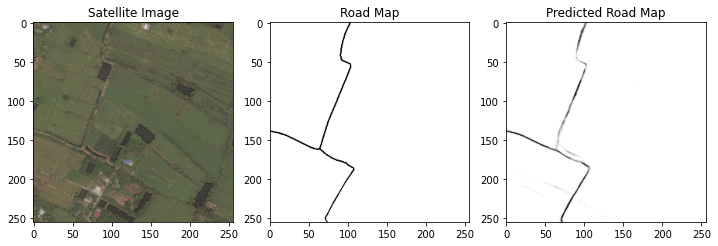

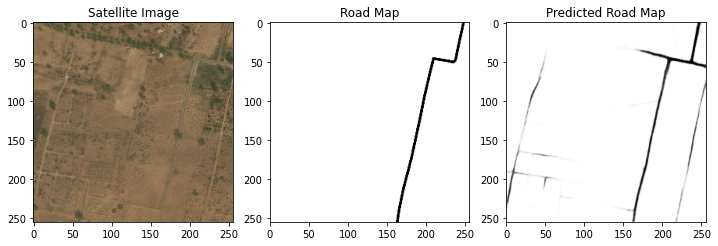

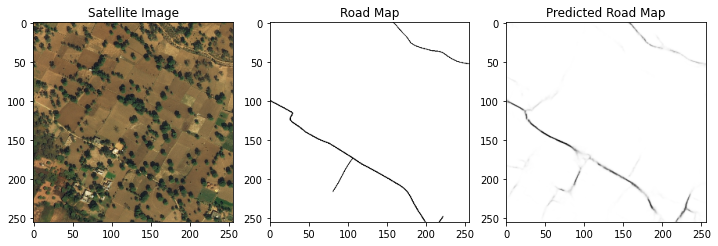

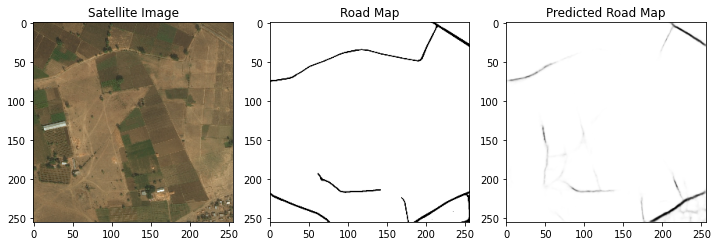

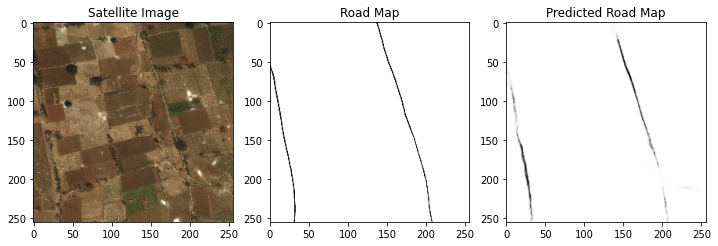

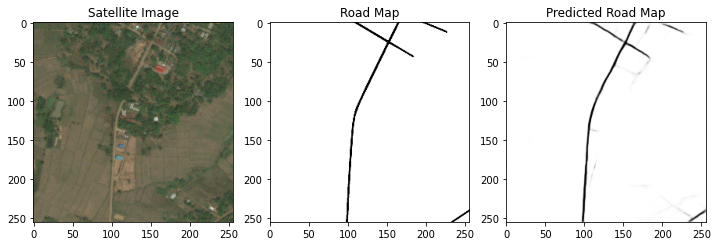

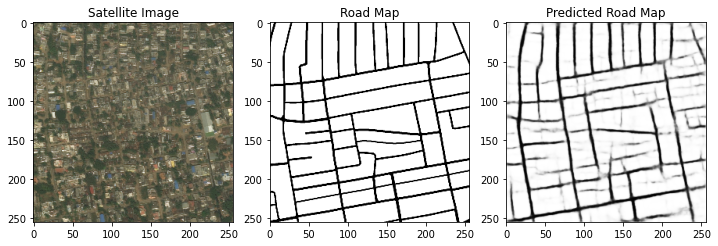

In [46]:
for i in list(np.random.choice(range(len(X_train)), size=15)):
    display_img_mask_pred(i, save_fig=True)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

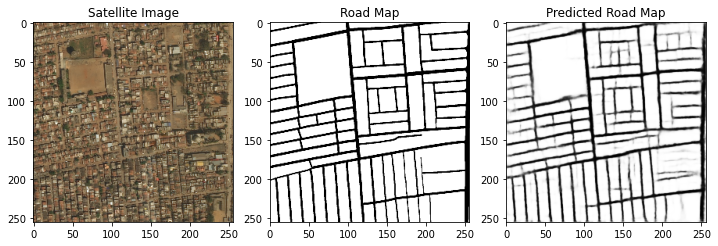

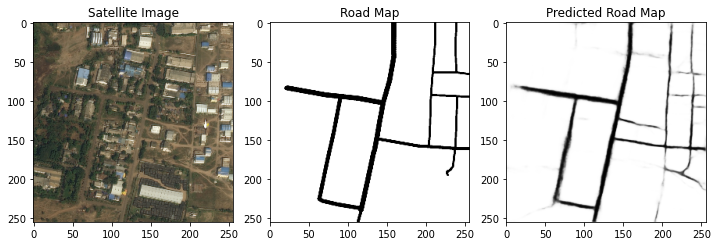

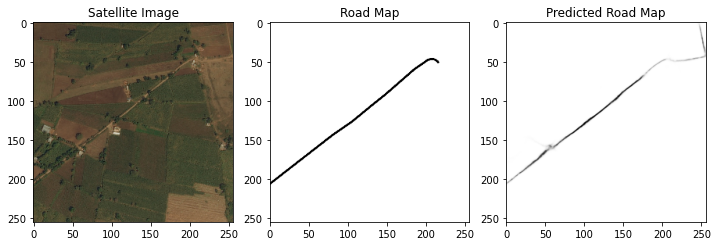

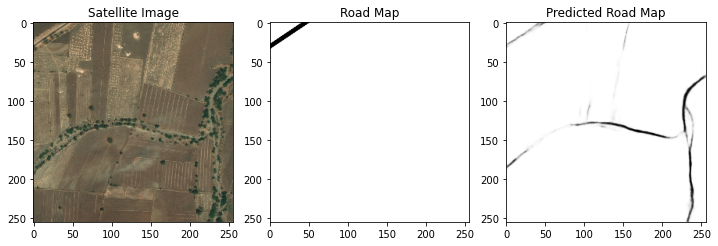

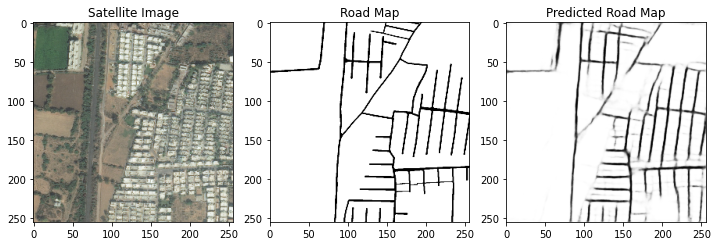

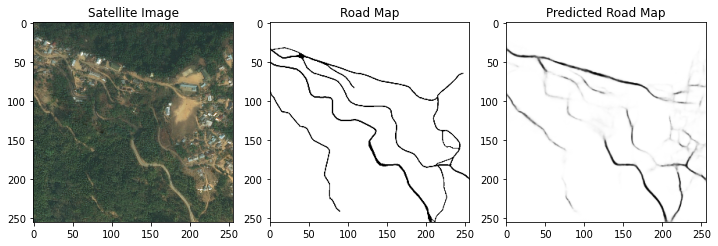

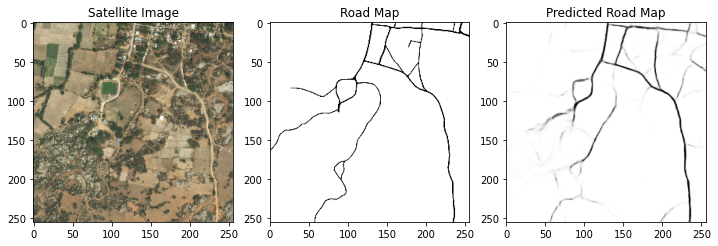

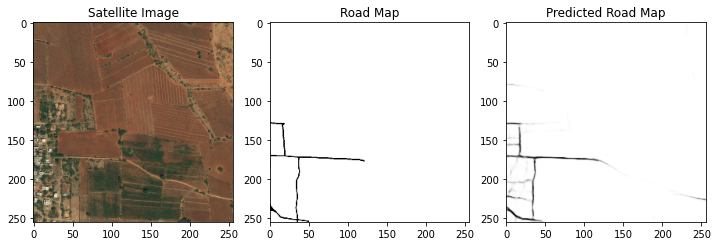

In [45]:
follow_index = [2272, 3492, 5252, 5540, 2896, 6138, 5161, 758]
for i in follow_index:
    display_img_mask_pred(i, save_fig=True)
    

In [36]:
def display_img_pred_test(index, save_fig=False):
    
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    
    ax[0].imshow(X_test[index])
    ax[0].set_title('Satellite Image')
    
    predict_data = trained_model.predict(X_test[index].reshape(-1, 256, 256, 3))[0]

    ax[1].imshow(predict_data[:, :, 0], cmap='Greys')
    ax[1].set_title('Predicted Road Map')
    
    plt.tight_layout()
    
    if save_fig:
      fig.savefig(f'figures/test_img_predicted_road_map_final_model_{index}.png', dpi=300)
      files.download(f'figures/test_img_predicted_road_map_final_model_{index}.png') 
    
    #plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

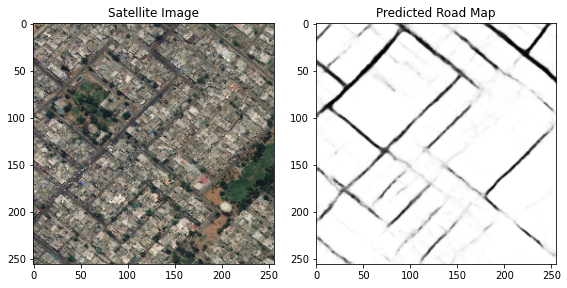

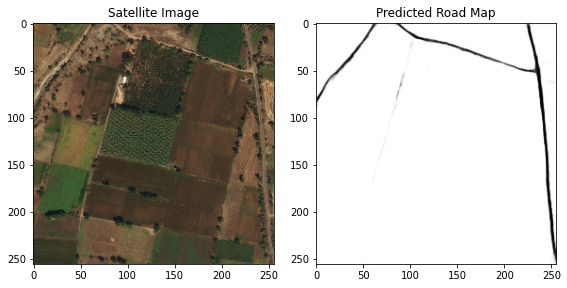

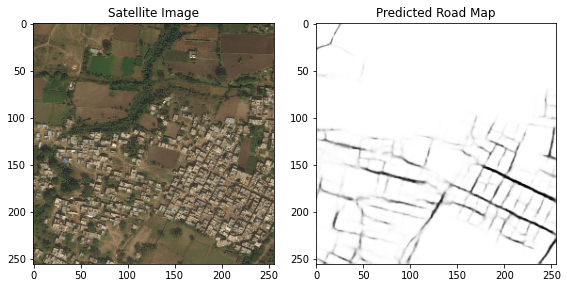

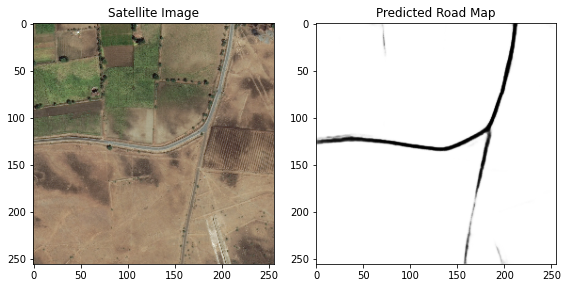

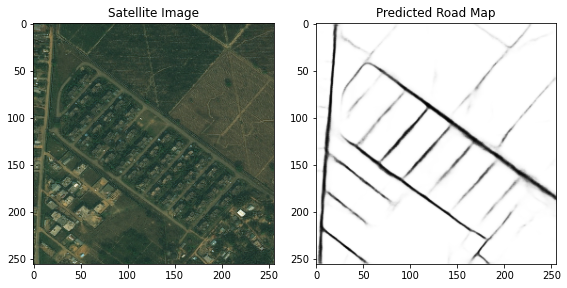

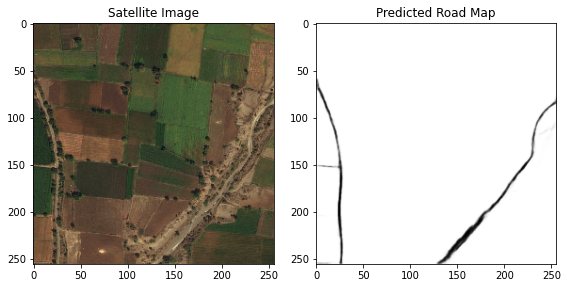

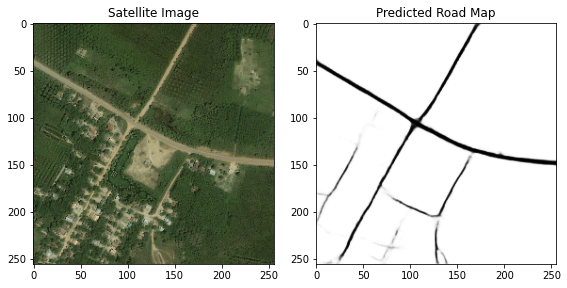

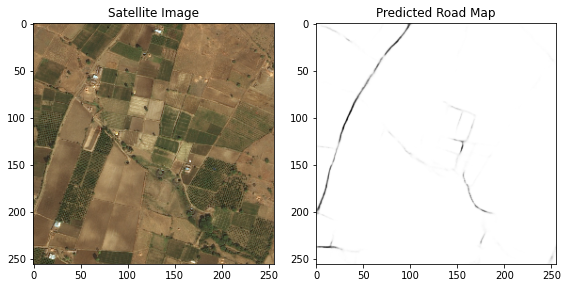

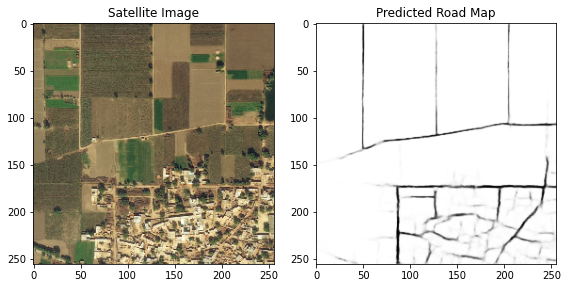

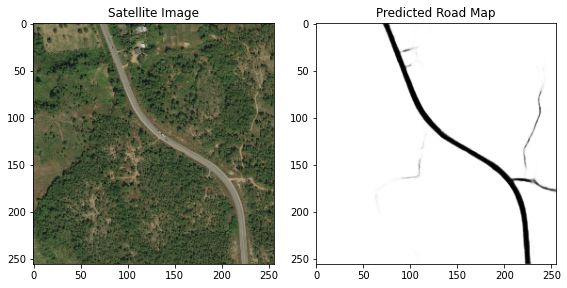

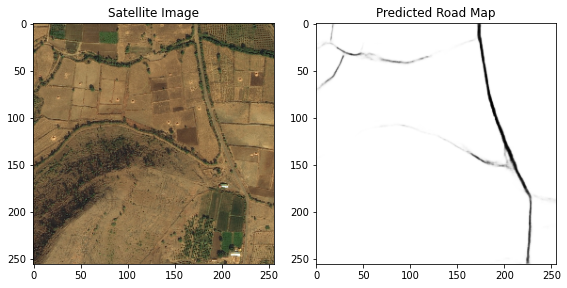

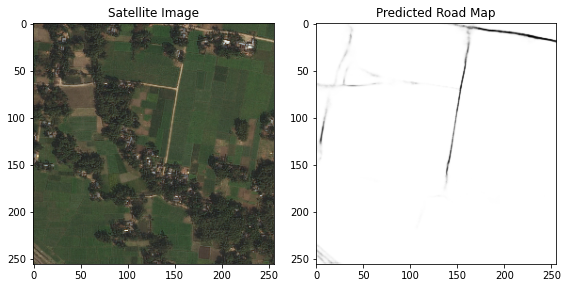

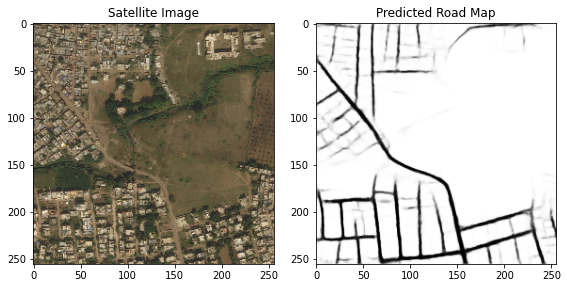

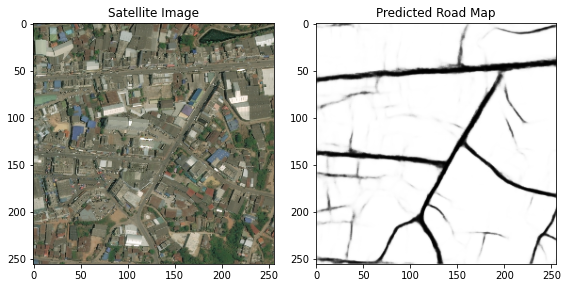

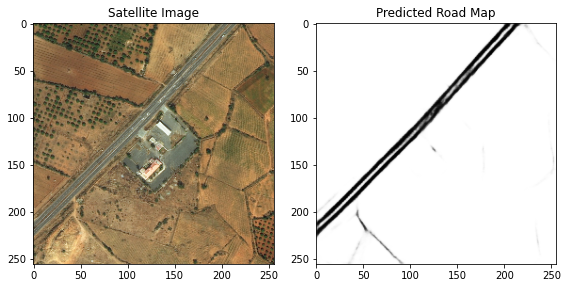

In [37]:
for i in list(np.random.choice(range(len(X_test)), size=15)):
    display_img_pred_test(i, save_fig=True)
    

In [38]:
before_files = sorted(glob.glob('/content/drive/MyDrive/maxar_data/*_before_crop_*.jpg'))
after_files = sorted(glob.glob('/content/drive/MyDrive/maxar_data/*_after_crop_*.jpg'))


In [39]:
image_size = 256


In [40]:
test_dict = {'before' : [], 'after' : []}

for i, bfile in enumerate(before_files):
    before = plt.imread(bfile)   
    before = cv2.resize(before, (image_size, image_size))
    
    after = plt.imread(after_files[i])   
    after = cv2.resize(after, (image_size, image_size))
    
    test_dict['before'].append(before)
    test_dict['after'].append(after)
    

In [41]:
X_test_before, X_test_after = test_dict['before'], test_dict['after']


In [42]:
X_test_before = np.array(X_test_before)
X_test_after = np.array(X_test_after)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

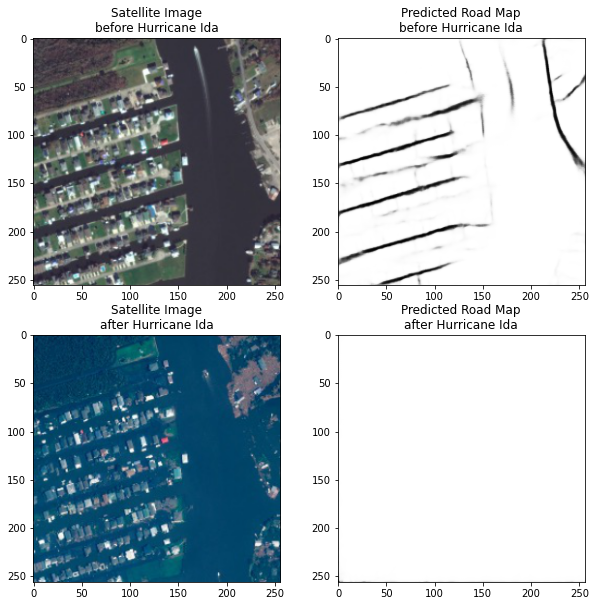

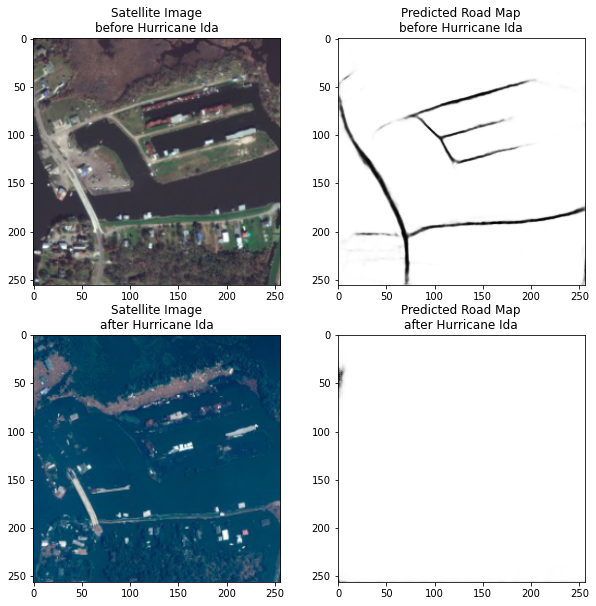

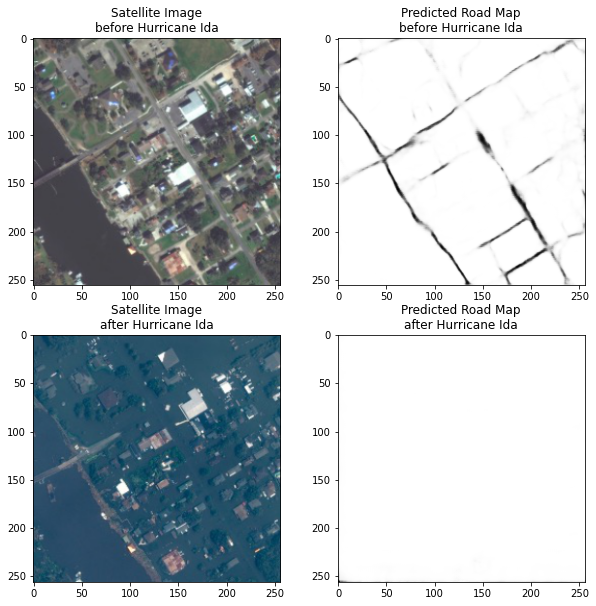

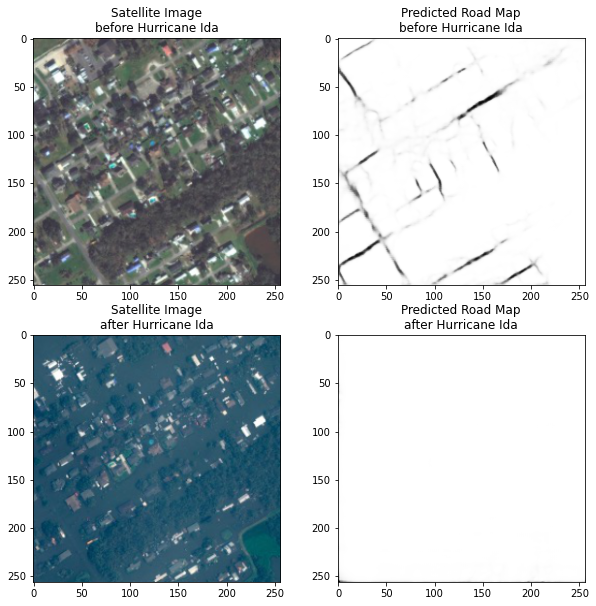

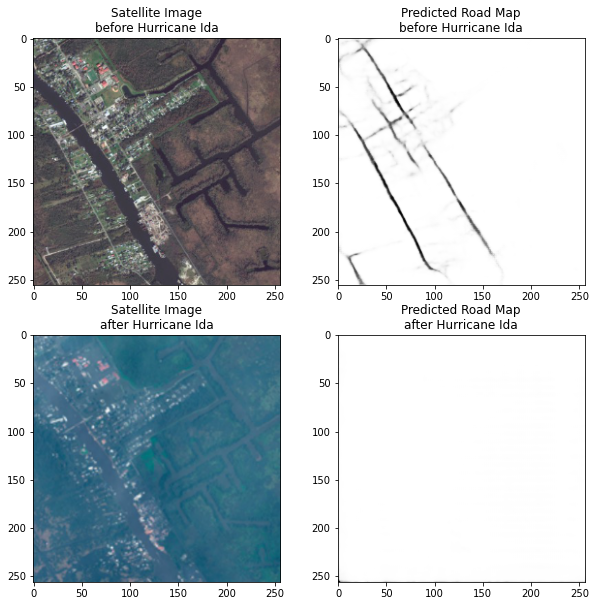

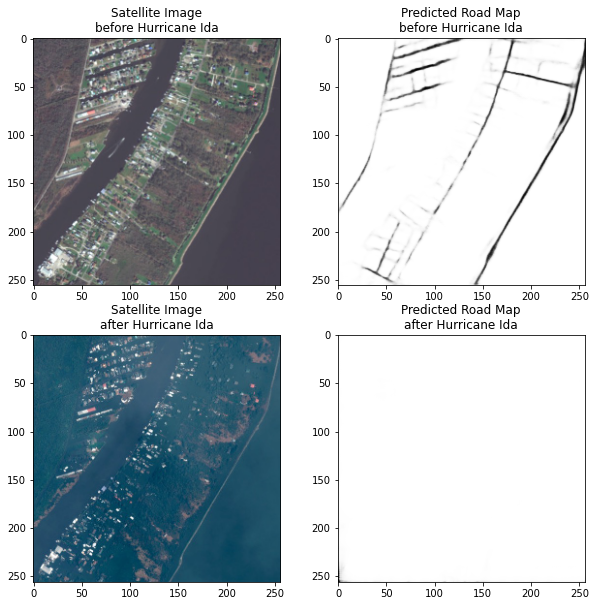

In [43]:
for i in range(len(X_test_before)):
               
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    
    ax[0,0].imshow(X_test_before[i])
    ax[0,0].set_title('Satellite Image\nbefore Hurricane Ida')
    
    predict_before_data = trained_model.predict(X_test_before[i].reshape(-1, 256, 256, 3))[0]

    ax[0,1].imshow(predict_before_data[:, :, 0], cmap='Greys')
    ax[0,1].set_title('Predicted Road Map\nbefore Hurricane Ida')

    ax[1,0].imshow(X_test_after[i])
    ax[1,0].set_title('Satellite Image\nafter Hurricane Ida')

    predict_after_data = trained_model.predict(X_test_after[i].reshape(-1, 256, 256, 3))[0]
    
    ax[1,1].imshow(predict_after_data[:, :, 0], cmap='Greys')
    ax[1,1].set_title('Predicted Road Map\nafter Hurricane Ida')

    fig.savefig(f'figures/hurricane_ida_predicted_road_map_final_model_{i}.png', dpi=300)
    files.download(f'figures/hurricane_ida_predicted_road_map_final_model_{i}.png')
